In [313]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks", color_codes=True)



In [314]:
df = pd.read_csv('Summary of Weather.csv')
df.head(5)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3077: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [316]:
df.shape

(119040, 31)

In [317]:
df.drop(['STA'], axis=1,inplace=True)

In [318]:
df.isnull().sum()

Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [319]:
deleted_columns = []
for i in dict(df.isnull().sum()).keys():
    if dict(df.isnull().sum())[i]>=60000:
        deleted_columns.append(i)


In [320]:
df.drop(df[deleted_columns],axis = 1,inplace=True)

In [321]:
float_columns = []
object_columns = []
for i in dict(df.isnull().sum()).keys():
    if dict(df.isnull().sum())[i]>=1:
         if df[i].dtype==object:
              object_columns.append(i)
         else:
             float_columns.append(i)


In [322]:
for column in object_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

for column in float_columns:
    df[column].fillna(df[column].mean(), inplace=True)


In [323]:
df.isnull().sum()

Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
PRCP        0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

In [324]:
cont_variables = []
discrt_variables = []
for i in df.columns:
    
    if df[i].dtype==object:
        discrt_variables.append(i)
    else:
        cont_variables.append(i)

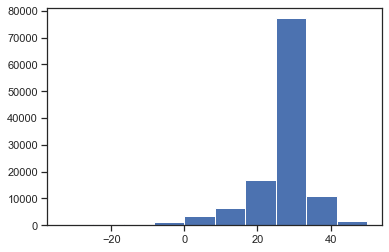

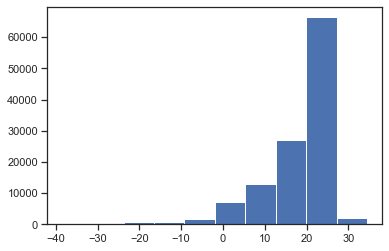

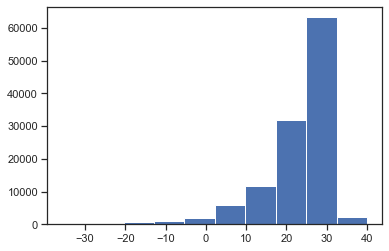

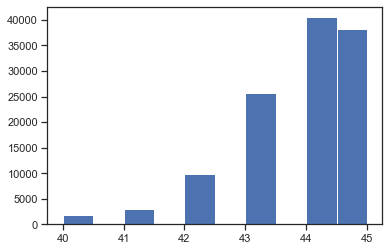

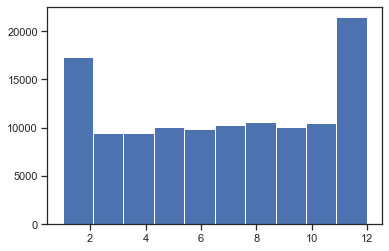

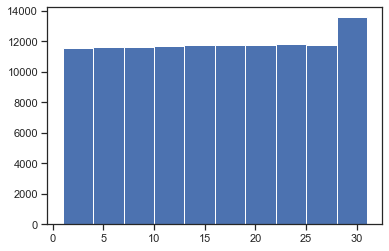

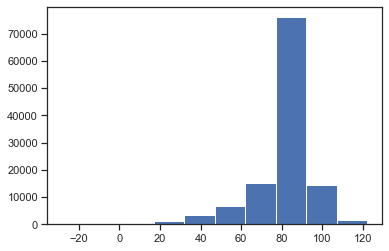

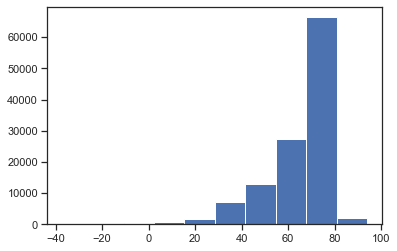

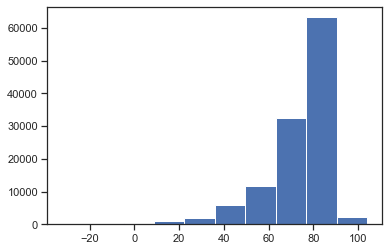

In [325]:
for column in cont_variables:
    plt.hist(df[column])
    plt.show()

In [326]:
df.describe()
    

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843
std,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,14.839727,14.453003,14.181324
min,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000
25%,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000
50%,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000
75%,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000


In [327]:
for column in discrt_variables[1:]:
  print(df[column].value_counts())

0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
136.652        1
162.052        1
107.696        1
106.68         1
234.95         1
Name: Precip, Length: 540, dtype: int64
0.0        87253
0          29600
5.08         527
7.62         319
2.54         317
10.16        195
12.7          90
20.32         83
17.78         78
15.24         70
22.86         69
25.4          68
#VALUE!       44
27.94         40
30.48         31
45.72         25
50.8          24
2.54          22
48.26         22
35.56         20
33.02         15
60.96         13
7.62          11
38.1          11
66.04         11
43.18         10
53.34         10
10.16         10
5.08           7
63.5           7
40.64          6
55.88          6
58.42          5
76.2           5
15.24          4
81.28          4
78.74          2
12.7           2
73.66          1
83.82          1
86.36          1
68.58          1
Name: Snowfall, dtype: int64
0       64267
T       16753
0.

In [328]:
discrt_variables

['Date', 'Precip', 'Snowfall', 'PRCP', 'SNF']

In [329]:
df.loc[df['Precip'] == 'T', 'Precip'] = 1
df.loc[df['Precip'] == '0.254' , 'Precip'] = 2
df.loc[df['Precip'] == '0.508' , 'Precip'] = 3
df.loc[df['Precip'] == '0.762' , 'Precip'] = 4
non = []
for value in df['Precip']:
    if value not in [1,2,3,4,'0']:
        non.append(value)

df.loc[df['Precip'].isin(non) ,'Precip']=5

In [330]:
df['Precip'].value_counts()

0    64267
5    29707
1    16753
2     3389
3     2909
4     2015
Name: Precip, dtype: int64

In [331]:
df['Snowfall'].value_counts()

0.0        87253
0          29600
5.08         527
7.62         319
2.54         317
10.16        195
12.7          90
20.32         83
17.78         78
15.24         70
22.86         69
25.4          68
#VALUE!       44
27.94         40
30.48         31
45.72         25
50.8          24
2.54          22
48.26         22
35.56         20
33.02         15
60.96         13
7.62          11
38.1          11
66.04         11
43.18         10
53.34         10
10.16         10
5.08           7
63.5           7
40.64          6
55.88          6
58.42          5
76.2           5
15.24          4
81.28          4
78.74          2
12.7           2
73.66          1
83.82          1
86.36          1
68.58          1
Name: Snowfall, dtype: int64

In [332]:

df = df[df['Snowfall'] != '#VALUE!']

In [333]:
df['Snowfall'] = df['Snowfall'].astype(float)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118996 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      118996 non-null  object 
 1   Precip    118996 non-null  object 
 2   MaxTemp   118996 non-null  float64
 3   MinTemp   118996 non-null  float64
 4   MeanTemp  118996 non-null  float64
 5   Snowfall  118996 non-null  float64
 6   YR        118996 non-null  int64  
 7   MO        118996 non-null  int64  
 8   DA        118996 non-null  int64  
 9   PRCP      118996 non-null  object 
 10  MAX       118996 non-null  float64
 11  MIN       118996 non-null  float64
 12  MEA       118996 non-null  float64
 13  SNF       118996 non-null  object 
dtypes: float64(7), int64(3), object(4)
memory usage: 13.6+ MB


In [335]:
df['PRCP'].value_counts()

0       64252
T       16732
0.01     3386
0.02     2909
0.03     2014
        ...  
4.58        1
3.56        1
4.2         1
4.37        1
3.29        1
Name: PRCP, Length: 540, dtype: int64

In [336]:
df.loc[df['PRCP'] == 'T', 'PRCP'] = 1

In [337]:
df['PRCP'] = df['PRCP'].astype(float)
df.loc[df['PRCP'] == 1, 'PRCP'] = df['PRCP'].mean()


In [338]:
df['PRCP'].value_counts()

0.000000    64252
0.267645    16801
0.010000     3386
0.020000     2909
0.030000     2014
            ...  
3.540000        1
3.590000        1
6.340000        1
4.440000        1
3.900000        1
Name: PRCP, Length: 539, dtype: int64

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118996 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      118996 non-null  object 
 1   Precip    118996 non-null  object 
 2   MaxTemp   118996 non-null  float64
 3   MinTemp   118996 non-null  float64
 4   MeanTemp  118996 non-null  float64
 5   Snowfall  118996 non-null  float64
 6   YR        118996 non-null  int64  
 7   MO        118996 non-null  int64  
 8   DA        118996 non-null  int64  
 9   PRCP      118996 non-null  float64
 10  MAX       118996 non-null  float64
 11  MIN       118996 non-null  float64
 12  MEA       118996 non-null  float64
 13  SNF       118996 non-null  object 
dtypes: float64(8), int64(3), object(3)
memory usage: 13.6+ MB


In [340]:
date = []
for value in df['Date']:
    date.append(value[5])



In [341]:
df['Date'] = date

In [342]:
summer = ['6','7','8']
spring = ['3','4','5']
winter = ['11','12','1']
fall  = ['9','10','11']
df.loc[df['Date'].isin(summer), 'Date'] = 'summer'
df.loc[df['Date'].isin(spring), 'Date'] = 'spring'
df.loc[df['Date'].isin(winter), 'Date'] = 'winter'
df.loc[df['Date'].isin(fall), 'Date'] = 'fall'


In [346]:
df.loc[df['Date'] == '2', 'Date'] = 'spring'

In [343]:
df.head(5)

,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,summer,5,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0
1,summer,0,28.888889,21.666667,25.555556,0.0,42,7,2,0.00,84.0,71.0,78.0,0
2,summer,5,26.111111,22.222222,24.444444,0.0,42,7,3,0.10,79.0,72.0,76.0,0
3,summer,5,26.666667,22.222222,24.444444,0.0,42,7,4,0.10,80.0,72.0,76.0,0
4,summer,0,26.666667,21.666667,24.444444,0.0,42,7,5,0.00,80.0,71.0,76.0,0


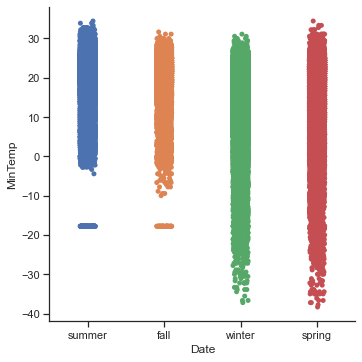

In [347]:
sns.catplot(x="Date", y="MinTemp", data=df)

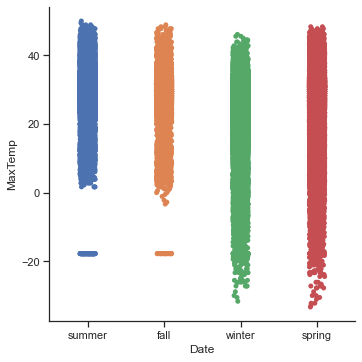

In [348]:
sns.catplot(x="Date", y="MaxTemp", data=df)

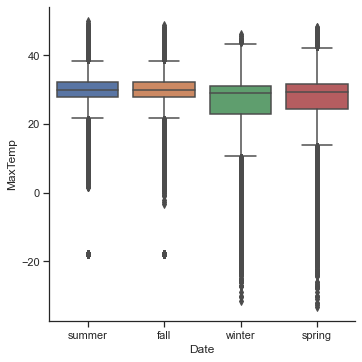

In [349]:
sns.catplot(x="Date", y="MaxTemp",kind="box", data=df)

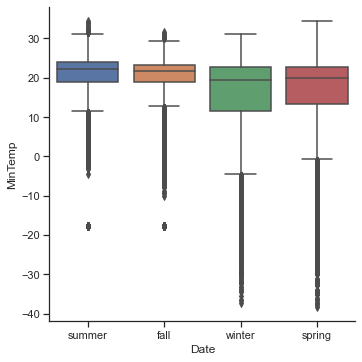

In [350]:
sns.catplot(x="Date", y="MinTemp",kind="box", data=df)

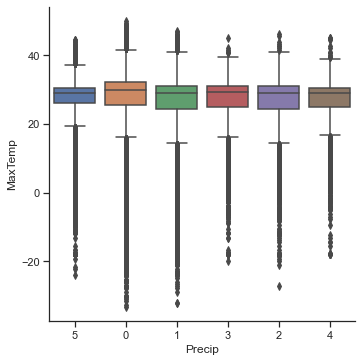

In [351]:
sns.catplot(x="Precip", y="MaxTemp",kind="box", data=df)

In [353]:
df.corr()

,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA
MaxTemp,1.000000,0.877921,0.968926,-0.322799,0.039198,0.030886,-0.004954,-0.008733,0.945450,0.825657,0.915265
MinTemp,0.877921,1.000000,0.965292,-0.308584,-0.021224,0.068711,-0.002351,0.089523,0.841183,0.963240,0.930914
MeanTemp,0.968926,0.965292,1.000000,-0.324483,0.010232,0.050348,-0.003948,0.040768,0.919086,0.917456,0.949226
Snowfall,-0.322799,-0.308584,-0.324483,1.000000,-0.001033,-0.044559,-0.000240,-0.008187,-0.341182,-0.320142,-0.341709
YR,0.039198,-0.021224,0.010232,-0.001033,1.000000,-0.144497,-0.011134,0.000104,0.013447,-0.043674,-0.015183
MO,0.030886,0.068711,0.050348,-0.044559,-0.144497,1.000000,0.006677,0.038142,0.033791,0.071969,0.054317
DA,-0.004954,-0.002351,-0.003948,-0.000240,-0.011134,0.006677,1.000000,0.000736,-0.003101,-0.000500,-0.001867
PRCP,-0.008733,0.089523,0.040768,-0.008187,0.000104,0.038142,0.000736,1.000000,-0.010262,0.092348,0.041863
MAX,0.945450,0.841183,0.919086,-0.341182,0.013447,0.033791,-0.003101,-0.010262,1.000000,0.873136,0.968073
MIN,0.825657,0.963240,0.917456,-0.320142,-0.043674,0.071969,-0.000500,0.092348,0.873136,1.000000,0.966446


In [354]:
features = ['Date', 'Precip', 'MaxTemp', 'MeanTemp', 'Snowfall', 'MAX', 'MIN', 'MEA', 'SNF']
target = 'MinTemp'

In [363]:
df_model = df[['Date', 'Precip', 'MaxTemp', 'MeanTemp', 'Snowfall', 'MAX', 'MIN', 'MEA', 'SNF','MinTemp']]

In [364]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118996 entries, 0 to 119039
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      118996 non-null  object 
 1   Precip    118996 non-null  object 
 2   MaxTemp   118996 non-null  float64
 3   MeanTemp  118996 non-null  float64
 4   Snowfall  118996 non-null  float64
 5   MAX       118996 non-null  float64
 6   MIN       118996 non-null  float64
 7   MEA       118996 non-null  float64
 8   SNF       118996 non-null  object 
 9   MinTemp   118996 non-null  float64
dtypes: float64(7), object(3)
memory usage: 15.0+ MB


In [365]:
df_model['SNF'] = df_model['SNF'].astype(float)

/var/folders/k1/y1ys0ktd5_zcdp_4_bcvpn0w0000gn/T/ipykernel_42745/1171873856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['SNF'] = df_model['SNF'].astype(float)


In [366]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118996 entries, 0 to 119039
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      118996 non-null  object 
 1   Precip    118996 non-null  object 
 2   MaxTemp   118996 non-null  float64
 3   MeanTemp  118996 non-null  float64
 4   Snowfall  118996 non-null  float64
 5   MAX       118996 non-null  float64
 6   MIN       118996 non-null  float64
 7   MEA       118996 non-null  float64
 8   SNF       118996 non-null  float64
 9   MinTemp   118996 non-null  float64
dtypes: float64(8), object(2)
memory usage: 15.0+ MB


In [372]:
df_model.loc[df_model['Precip']=='0','Precip'] = 0

/Users/joshgunguliyev/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [374]:
df_model.head()

,Date,Precip,MaxTemp,MeanTemp,Snowfall,MAX,MIN,MEA,SNF,MinTemp
0,summer,5,25.555556,23.888889,0.0,78.0,72.0,75.0,0.0,22.222222
1,summer,0,28.888889,25.555556,0.0,84.0,71.0,78.0,0.0,21.666667
2,summer,5,26.111111,24.444444,0.0,79.0,72.0,76.0,0.0,22.222222
3,summer,5,26.666667,24.444444,0.0,80.0,72.0,76.0,0.0,22.222222
4,summer,0,26.666667,24.444444,0.0,80.0,71.0,76.0,0.0,21.666667


In [375]:
df_model.to_csv("weather_train_data.csv")